<a href="https://colab.research.google.com/github/aasimasheikh-02/Deep-Learning/blob/main/flower_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
os.listdir(data_dir)

['sunflowers', 'daisy', 'dandelion', 'tulips', 'LICENSE.txt', 'roses']

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob   

In [ ]:
list(data_dir.glob('*'))

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/roses')]

In [ ]:
list(data_dir.glob('dandelion/*'))

[PosixPath('/root/.keras/datasets/flower_photos/dandelion/315645471_dda66c6338_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4669815582_0a994fb4fd_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/5598591979_ed9af1b3e9_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/2470874500_43d8011e75.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/19067907051_16d530c7d2.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/5600240736_4a90c10579_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4562516418_8ccb8c103f.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/3461986955_29a1abc621.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/5727534342_419604c177_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/8717787983_c83bdf39fe_n.jpg'),
 PosixPath('/root/.keras/dat

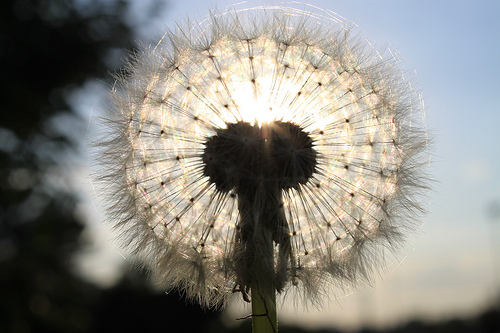

In [ ]:
PIL.Image.open('/root/.keras/datasets/flower_photos/dandelion/4645101643_9c9d9df13e.jpg')

In [ ]:
batch_size = 64
epochs = 30
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,validation_split=0.2)
image_gen_val = ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='sparse',
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [ ]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                 class_mode='sparse',
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [ ]:
IMAGE_SIZE = [IMG_HIEGHT,IMG_WIDHT]

In [ ]:
IMAGE_SIZE

[224, 224]

In [ ]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(5,activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,epochs=15, validation_data=val_data_gen)

Epoch 1/15
46/46 [==============================] - 37s 525ms/step - loss: 1.0564 - accuracy: 0.6359 - val_loss: 0.6523 - val_accuracy: 0.7551
Epoch 2/15
46/46 [==============================] - 18s 383ms/step - loss: 0.3805 - accuracy: 0.8826 - val_loss: 0.5591 - val_accuracy: 0.8085
Epoch 3/15
46/46 [==============================] - 18s 379ms/step - loss: 0.2279 - accuracy: 0.9449 - val_loss: 0.5937 - val_accuracy: 0.7934
Epoch 4/15
46/46 [==============================] - 18s 384ms/step - loss: 0.1611 - accuracy: 0.9718 - val_loss: 0.5531 - val_accuracy: 0.7962
Epoch 5/15
46/46 [==============================] - 18s 388ms/step - loss: 0.1063 - accuracy: 0.9881 - val_loss: 0.5559 - val_accuracy: 0.8112
Epoch 6/15
46/46 [==============================] - 19s 403ms/step - loss: 0.0799 - accuracy: 0.9959 - val_loss: 0.5529 - val_accuracy: 0.8140
Epoch 7/15
46/46 [==============================] - 19s 399ms/step - loss: 0.0606 - accuracy: 0.9990 - val_loss: 0.5385 - val_accuracy: 0.8112

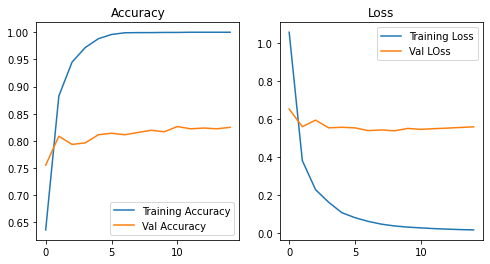

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
from tensorflow.keras.utils import img_to_array,array_to_img,load_img

In [ ]:
test= load_img('rose_images.jpg', target_size=(224,224))

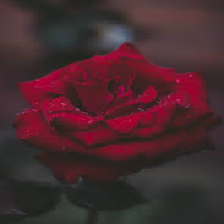

In [ ]:
test

In [ ]:
test_array= img_to_array(test)

In [ ]:
test_array.shape

(224, 224, 3)

In [ ]:
test_array= test_array.reshape(1,224,224,3)

In [ ]:
model.predict(test_array)

1/1 [==============================] - 1s 748ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)